In [236]:
%matplotlib inline
import pandas as pd
import numpy as np

In [237]:
train = pd.read_json("train.json")
train.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [238]:
train.shape

(39774, 3)

In [239]:
train.info

<bound method DataFrame.info of           id      cuisine                                        ingredients
0      10259        greek  [romaine lettuce, black olives, grape tomatoes...
1      25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2      20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3      22213       indian                [water, vegetable oil, wheat, salt]
4      13162       indian  [black pepper, shallots, cornflour, cayenne pe...
...      ...          ...                                                ...
39769  29109        irish  [light brown sugar, granulated sugar, butter, ...
39770  11462      italian  [KRAFT Zesty Italian Dressing, purple onion, b...
39771   2238        irish  [eggs, citrus fruit, raisins, sourdough starte...
39772  41882      chinese  [boneless chicken skinless thigh, minced garli...
39773   2362      mexican  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 3 columns]>

In [240]:
train.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

In [241]:
train.describe()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [242]:
train.dtypes

id              int64
cuisine        object
ingredients    object
dtype: object

In [243]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [244]:
len(train["ingredients"].loc[0])

9

In [245]:
train["ingredients"].head(1)

0    [romaine lettuce, black olives, grape tomatoes...
Name: ingredients, dtype: object

In [246]:
train["num_ingredients"] = train["ingredients"].apply(len)
train.head()

,id,cuisine,ingredients,num_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


In [247]:
train.groupby("cuisine").num_ingredients.mean()

cuisine
brazilian        9.520343
british          9.708955
cajun_creole    12.617076
chinese         11.982791
filipino        10.000000
french           9.817838
greek           10.182128
indian          12.705961
irish            9.299850
italian          9.909033
jamaican        12.214829
japanese         9.735067
korean          11.284337
mexican         10.877446
moroccan        12.909866
russian         10.224949
southern_us      9.634954
spanish         10.423660
thai            12.545809
vietnamese      12.675152
Name: num_ingredients, dtype: float64

In [248]:
train.groupby("cuisine").num_ingredients.describe()

,count,mean,std,min,25%,50%,75%,max
cuisine,,,,,,,,
brazilian,467.0,9.520343,5.555139,2.0,5.0,9.0,13.0,59.0
british,804.0,9.708955,4.165011,2.0,7.0,9.0,12.0,30.0
cajun_creole,1546.0,12.617076,4.611601,2.0,9.0,12.0,16.0,31.0
chinese,2673.0,11.982791,4.042125,2.0,9.0,12.0,14.0,38.0
filipino,755.0,10.000000,3.855135,2.0,7.0,10.0,12.0,38.0
french,2646.0,9.817838,4.144744,1.0,7.0,9.0,12.0,31.0
greek,1175.0,10.182128,3.729461,1.0,7.0,10.0,12.0,27.0
indian,3003.0,12.705961,5.016806,1.0,9.0,12.0,16.0,49.0
irish,667.0,9.299850,3.700505,2.0,7.0,9.0,12.0,27.0


<AxesSubplot:title={'center':'num_ingredients'}, xlabel='cuisine'>

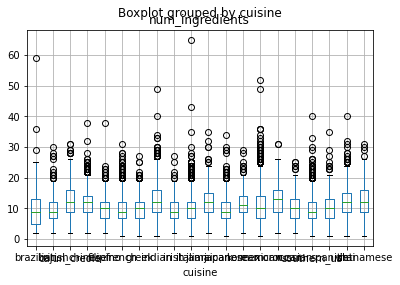

In [249]:
train.boxplot("num_ingredients", by = "cuisine")

In [250]:
sample_recipe = train.loc[3, "ingredients"]

In [251]:
sample_recipe

['water', 'vegetable oil', 'wheat', 'salt']

In [252]:
def mean_string_length(list_of_strings):
    return np.mean([len(string) for string in list_of_strings])

In [253]:
mean_string_length(sample_recipe)

6.75

In [254]:
train["ingredient_length"] = train["ingredients"].apply(mean_string_length)

In [255]:
train.head()

,id,cuisine,ingredients,num_ingredients,ingredient_length
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,6.750000
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000


<AxesSubplot:title={'center':'ingredient_length'}, xlabel='cuisine'>

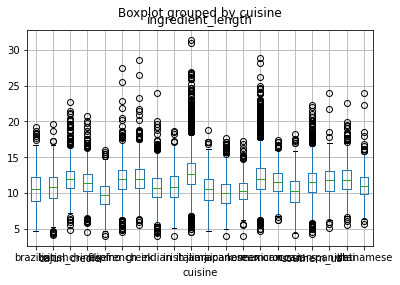

In [256]:
train.boxplot("ingredient_length", by = "cuisine")

In [257]:
def make_features(df):
    df["num_ingredients"] = df["ingredients"].apply(len)
    df["ingredient_length"] = df["ingredients"].apply(
        lambda x: np.mean([len(item) for item in x])
    )
    return df

In [258]:
train = make_features(pd.read_json("train.json"))
train.head()

,id,cuisine,ingredients,num_ingredients,ingredient_length
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,6.750000
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000


In [259]:
feature_cols = ["num_ingredients", "ingredient_length"]
X = train[feature_cols]
y = train["cuisine"]

In [260]:
print(X.shape)
print(y.shape)

(39774, 2)
(39774,)


In [261]:
y.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [262]:
y.values

array(['greek', 'southern_us', 'filipino', ..., 'irish', 'chinese',
       'mexican'], dtype=object)

In [263]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 100)

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 1
)

In [265]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29830, 2)
(29830,)
(9944, 2)
(9944,)


In [266]:
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)

In [267]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.21932823813354788

In [268]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, X, y, cv = 5, scoring = "accuracy").mean()

0.21617128785930798

In [269]:
y_train.value_counts()

italian         5857
mexican         4802
southern_us     3255
indian          2254
chinese         2006
french          1990
cajun_creole    1173
thai            1137
japanese        1077
greek            874
spanish          736
vietnamese       643
korean           639
moroccan         626
british          595
filipino         567
irish            507
jamaican         376
russian          359
brazilian        357
Name: cuisine, dtype: int64

In [270]:
y_train.value_counts().head(1) / y_train.shape

italian    0.196346
Name: cuisine, dtype: float64

In [271]:
y_test.value_counts().head(1) / y_test.shape

italian    0.199216
Name: cuisine, dtype: float64

In [272]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy = "most_frequent")
dumb.fit(X_train, y_train)
y_pred_class = dumb.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.1992156074014481

In [273]:
new = make_features(pd.read_json("test.json"))
new.head()

,id,ingredients,num_ingredients,ingredient_length
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",6,9.333333
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",11,10.272727
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",6,9.666667
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",21,12.000000
4,35687,"[ground black pepper, salt, sausage casings, l...",8,13.000000


In [274]:
new.shape

(9944, 4)

In [275]:
X_new = new[feature_cols]
X_new.head()

,num_ingredients,ingredient_length
0,6,9.333333
1,11,10.272727
2,6,9.666667
3,21,12.000000
4,8,13.000000


In [276]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=100)

In [277]:
new_pred_class_knn = knn.predict(X_new)
new_pred_class_knn

array(['mexican', 'southern_us', 'mexican', ..., 'italian', 'mexican',
       'mexican'], dtype=object)

In [278]:
#Exporting a csv file for kaggle submission
#pd.DataFrame({"id":new["id"],
#              "cuisine": new_pred_class_knn})\
#    .set_index("id").to_csv("sub1.csv")

In [279]:
from sklearn.model_selection import GridSearchCV
param_grid = {}
param_grid["n_neighbors"] = [100, 200]
param_grid

{'n_neighbors': [100, 200]}

In [280]:
grid = GridSearchCV(knn, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)
grid.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=100), n_jobs=-1,
             param_grid={'n_neighbors': [100, 200]}, scoring='accuracy')

In [281]:
grid.best_score_

0.220269421581384

In [282]:
grid.best_params_

{'n_neighbors': 200}

In [283]:
param_grid = {}
param_grid["n_neighbors"] = list(range(200, 1001, 200))
param_grid

{'n_neighbors': [200, 400, 600, 800, 1000]}

In [284]:
%time grid = GridSearchCV(knn, param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)
grid.fit(X, y)

CPU times: user 48 µs, sys: 13 µs, total: 61 µs
Wall time: 66.8 µs


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=100), n_jobs=-1,
             param_grid={'n_neighbors': [200, 400, 600, 800, 1000]},
             scoring='accuracy')

In [285]:
grid.best_score_

0.22263283205900933

In [286]:
grid.best_params_

{'n_neighbors': 800}

In [287]:
#Converting a list of strings to one big string
train["ingredients"].astype(str)[0]

"['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles']"

In [288]:
def make_features(df):
    df["num_ingredients"] = df["ingredients"].apply(len)
    df["ingredient_length"] = df["ingredients"].apply(
        lambda x: np.mean([len(item) for item in x])
    )
    df["ingredients_str"] = df["ingredients"].astype(str)
    return df

In [289]:
train = make_features(pd.read_json("train.json"))
train.head()

,id,cuisine,ingredients,num_ingredients,ingredient_length,ingredients_str
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,12.000000,"['romaine lettuce', 'black olives', 'grape tom..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,10.090909,"['plain flour', 'ground pepper', 'salt', 'toma..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,10.333333,"['eggs', 'pepper', 'salt', 'mayonaise', 'cooki..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,6.750000,"['water', 'vegetable oil', 'wheat', 'salt']"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,10.100000,"['black pepper', 'shallots', 'cornflour', 'cay..."


In [290]:
X = train["ingredients_str"]
y = train["cuisine"]

In [291]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [292]:
X_dtm = vect.fit_transform(X)
X_dtm

<39774x3010 sparse matrix of type '<class 'numpy.int64'>'
	with 761951 stored elements in Compressed Sparse Row format>

In [293]:
vect = CountVectorizer(token_pattern = r"'([a-z ]+)'")
vect

CountVectorizer(token_pattern="'([a-z ]+)'")

In [295]:
X_dtm = vect.fit_transform(X)
vect.get_feature_names()

['a taste of thai rice noodles',
 'abalone',
 'abbamele',
 'absinthe',
 'abura age',
 'acai juice',
 'accent',
 'accent seasoning',
 'accompaniment',
 'achiote',
 'achiote paste',
 'achiote powder',
 'acini di pepe',
 'ackee',
 'acorn squash',
 'active dry yeast',
 'adobo',
 'adobo all purpose seasoning',
 'adobo sauce',
 'adobo seasoning',
 'adobo style seasoning',
 'adzuki beans',
 'agar',
 'agar agar flakes',
 'agave nectar',
 'agave tequila',
 'aged balsamic vinegar',
 'aged cheddar cheese',
 'aged gouda',
 'aged manchego cheese',
 'ahi',
 'ahi tuna steaks',
 'aioli',
 'ajinomoto',
 'ajwain',
 'aka miso',
 'alaskan king crab legs',
 'alaskan king salmon',
 'albacore',
 'albacore tuna in water',
 'alcohol',
 'ale',
 'aleppo',
 'aleppo pepper',
 'alexia waffle fries',
 'alfalfa sprouts',
 'alfredo sauce',
 'alfredo sauce mix',
 'all beef hot dogs',
 'all potato purpos',
 'all purpose seasoning',
 'all purpose unbleached flour',
 'allspice',
 'allspice berries',
 'almond butter',
 'al

In [296]:
X_dtm.shape

(39774, 6250)

In [297]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [298]:
cross_val_score(nb, X_dtm, y, cv = 5, scoring = "accuracy").mean()

0.7302007125509707